In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization,LeakyReLU
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [4]:
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain'
]

selected_classes = list(range(50))  # Classes 0 to 49

# Sample class names for illustration (replace with actual CIFAR-100 class names if needed)
class_names = [f'class_{i}' for i in selected_classes]

# Reshape labels if needed
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Create boolean masks to select only the desired 50 classes
train_mask = np.isin(y_train, selected_classes)
test_mask = np.isin(y_test, selected_classes)

# Apply the masks
X_train_filtered = X_train[train_mask]
y_train_filtered = y_train[train_mask]
X_test_filtered = X_test[test_mask]
y_test_filtered = y_test[test_mask]

# Normalize images
X_train_filtered = X_train_filtered.astype('float32') / 255.0
X_test_filtered = X_test_filtered.astype('float32') / 255.0

# Remap labels to 0–49 range
label_map = {label: i for i, label in enumerate(selected_classes)}
y_train_filtered = np.array([label_map[y] for y in y_train_filtered])
y_test_filtered = np.array([label_map[y] for y in y_test_filtered])

# One-hot encode labels for 50 classes
y_train_oh = to_categorical(y_train_filtered, num_classes=50)
y_test_oh = to_categorical(y_test_filtered, num_classes=50)

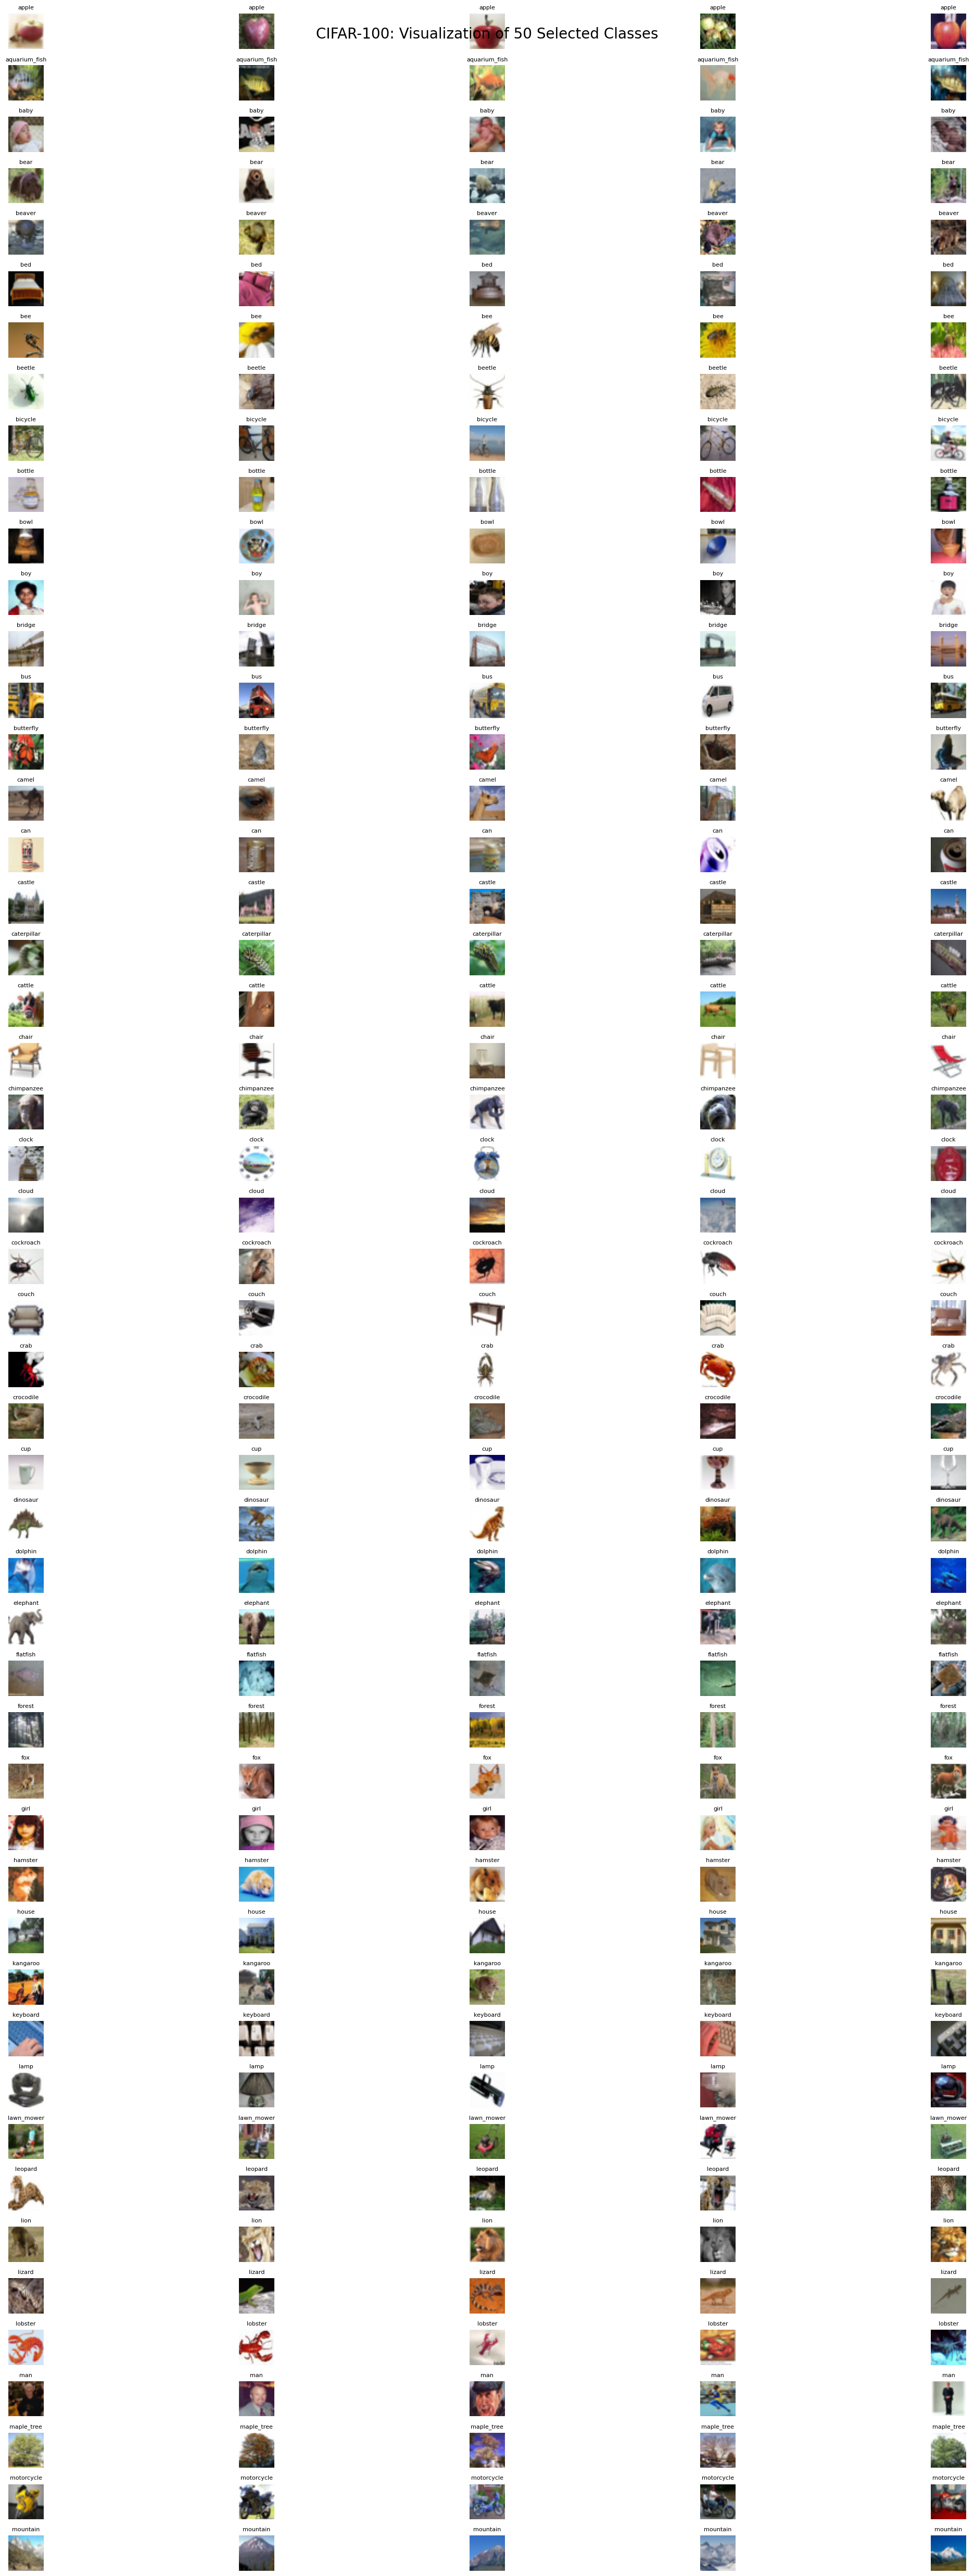

In [5]:
# List of 50 class names (replace with your selected class names if different)
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain'
]

# Create a figure for plotting
plt.figure(figsize=(25, 50))

# For each of the 50 classes, plot 5 sample images
for class_index, class_label in enumerate(range(50)):  # assuming labels are remapped 0–49
    # Find all indices in y_train_oh with this class
    indices = np.where(np.argmax(y_train_oh, axis=1) == class_label)[0]
    
    for i in range(5):
        plt.subplot(50, 5, class_index * 5 + i + 1)
        plt.imshow(X_train_filtered[indices[i]])
        plt.title(class_names[class_index], fontsize=8)
        plt.axis('off')

plt.suptitle("CIFAR-100: Visualization of 50 Selected Classes", fontsize=20)
plt.tight_layout()
plt.show()


In [7]:
model = Sequential()

#  Feature Extraction (CNN Layers)
model.add(Conv2D(32, (3, 3), activation='relu', padding='same',
                 input_shape=(32, 32, 3), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same',
                 kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


model.add(Conv2D(128, (3, 3), activation='relu', padding='same',
                 kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

#  Flatten to transition to Dense Layers
model.add(Flatten())

#  Fully Connected Layers (ANN Part)
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Dense(50, activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │              

 Total params: 3,867,480 (14.75 MB)

 Trainable params: 1,288,498 (4.92 MB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 2,576,998 (9.83 MB)

In [8]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [18]:
history = model.fit(
    X_train_filtered, y_train_oh,
    validation_data=(X_test_filtered, y_test_oh),
    epochs=20,
    batch_size=64
)


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5462 - loss: 2.6054 - val_accuracy: 0.5460 - val_loss: 2.6898
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5404 - loss: 2.6349 - val_accuracy: 0.5610 - val_loss: 2.6111
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5474 - loss: 2.5939 - val_accuracy: 0.5422 - val_loss: 2.6812
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5460 - loss: 2.6203 - val_accuracy: 0.5424 - val_loss: 2.6772
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5422 - loss: 2.6154 - val_accuracy: 0.5566 - val_loss: 2.6146
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5496 - loss: 2.6031 - val_accuracy: 0.4928 - val_loss: 2.8737
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5444 - loss: 2.6213 - val_accuracy: 0.5194 - val_loss: 2.8093
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5504 - loss: 2.5877 - val_accuracy: 0.

In [19]:
test_loss, test_acc = model.evaluate(X_test_filtered, y_test_oh)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5914 - loss: 2.4814
Test Accuracy: 58.74%


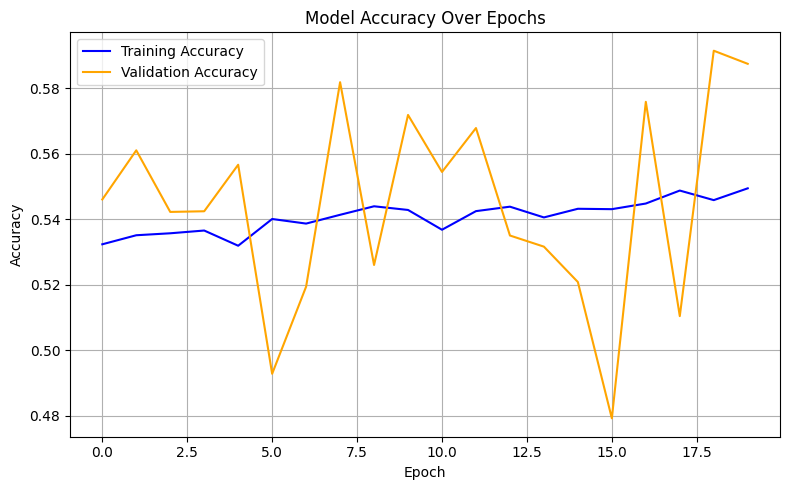

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


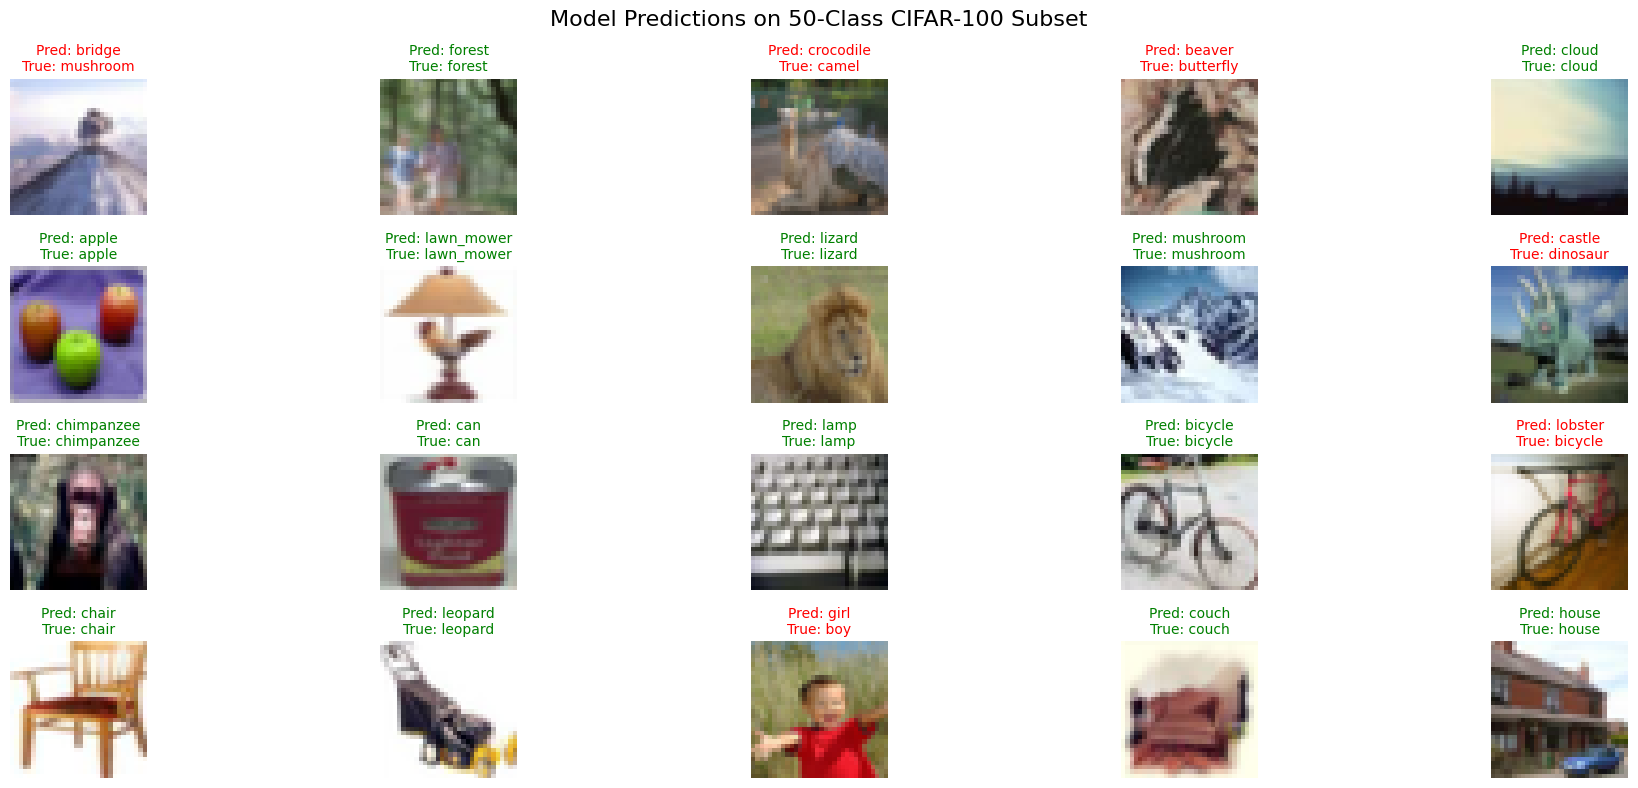

In [22]:
# Predict the first 20 test samples
pred_probs = model.predict(X_test_filtered[:20])
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(y_test_oh[:20], axis=1)

# Define class names for 50 selected classes (you must have already defined this list)
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 
    'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly',
    'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach',
    'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox',
    'girl', 'hamster', 'house', 'keyboard', 'lamp',
    'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster',
    'man', 'maple_tree', 'motorcycle', 'mouse', 'mushroom'
]

# Plot predictions
plt.figure(figsize=(20, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test_filtered[i])
    plt.title(
        f"Pred: {class_names[pred_classes[i]]}\nTrue: {class_names[true_classes[i]]}",
        color="green" if pred_classes[i] == true_classes[i] else "red",
        fontsize=10
    )
    plt.axis('off')

plt.suptitle("Model Predictions on 50-Class CIFAR-100 Subset", fontsize=16)
plt.tight_layout()
plt.show()
